In [1]:
import torch
from repop import dataset,params2theta,theta2params
from matplotlib import pyplot as plt
import pandas as pd

import numpy as np
np.random.seed(42)

In [2]:
threshold = 300
df = pd.read_csv('real_data/Exp_1_Ecoli_population.csv')
df.iloc[:,1] = pd.to_numeric(df.iloc[:,1], errors='coerce').fillna(np.inf)
df.iloc[:,2] = pd.to_numeric(df.iloc[:,2], errors='coerce').fillna(0)

dil_schedule = np.array((20,200,2000))/.9

/tmp/ipykernel_8563/808629437.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,1] = pd.to_numeric(df.iloc[:,1], errors='coerce').fillna(np.inf)
/tmp/ipykernel_8563/808629437.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,2] = pd.to_numeric(df.iloc[:,2], errors='coerce').fillna(0)


In [3]:
def get_counts(df,day):
    ks = df.to_numpy()[df['Day']==day,1:3]

    cts,dils =[],[]
    for k_line in ks:
        index = np.argmax(k_line <= threshold) if np.any(ks <= threshold) else len(ks) - 1
        cts.append( k_line[index] )
        dils.append( dil_schedule[index] )

    cts,dils = np.array(cts).astype(int),np.array(dils).astype(float)
    keep = np.logical_and(cts<=300,  cts>=0)

    return cts[keep],dils[keep]

In [4]:
days = (3,5,7,9)

data_day =[]
for day in days:
    cts,dils = get_counts(df,day)
    data_day.append(dataset(cts,dils))
    (data_day[-1]).evaluate()

8
11.585201340838122 -271.81979298488164 -560.9048613554847
11.086675290087545 -358.3846989848224 -440.47592229610365
8.647400812796873 -266.70525701617134 -355.13984970889254
7.764432791880681 -271.07311447561636 -287.5417480665641
6.954385144343031 -266.8699455288963 -233.41787480114434
6.252875822732291 -261.9972076716094 -187.79441149404175
5.877332948889732 -263.2275803911432 -159.70245498216738
5.573757860007005 -263.4148635868984 -137.67749889625992
5.27157295974347 -263.2407266520999 -116.1226623916428
5.018204622868234 -263.0625270387993 -98.07552297033668
4.815501482830804 -262.75777447099244 -83.82424432897889
4.654182880095885 -262.80602263322555 -72.19166127494968
4.497385387872411 -262.3367594670098 -61.31623607655757
4.371451435248963 -262.1555001697983 -52.526338765041146
4.2973398579549364 -262.1708385276047 -47.20693536596756
4.251856478568877 -262.1660978463833 -43.94315710392451
4.225311382207641 -262.1187573506985 -42.08730509046378
4.204883703243136 -261.932024138

/tmp/ipykernel_8563/1270109755.py:10: RuntimeWarning: invalid value encountered in cast
  cts,dils = np.array(cts).astype(int),np.array(dils).astype(float)


8
6.618599572953759 -360.7682554687708 -82.47502018931297
6.4706996232373175 -361.49641482226286 -71.98750569669106
6.4202300306817355 -361.7647562449667 -68.37467645578818
6.407305873564486 -362.5310637003638 -66.75414887311605
6.397846441356274 -363.10502826906577 -65.54503133991076
6.38793433760631 -363.63618991290423 -64.34716976225664
6.362212575519521 -364.211273296581 -62.03849630885931
6.315092276597086 -363.86574182283437 -59.19801068149664
6.245810892109573 -362.3100290102933 -56.150032809931176
6.22102838990854 -362.13803519873954 -54.66625068139335
6.2061167234562475 -362.31592871417575 -53.48695047855413
6.197214010432524 -362.4864214737843 -52.719749760277736
6.167717748815231 -362.5514768030668 -50.66000172337344
6.130354591282657 -362.5855888080341 -48.13133272121196
6.1098738757170565 -362.63437966393616 -46.71772940591729
6.092974074506082 -362.7637886991121 -45.4601029989068
6.083607049674776 -362.9127779610518 -44.684752508893084
6.07738437831765 -363.0233394766253 

/tmp/ipykernel_8563/1270109755.py:10: RuntimeWarning: invalid value encountered in cast
  cts,dils = np.array(cts).astype(int),np.array(dils).astype(float)


8
7.160640436821516 -388.3287049761167 -76.90707185355046
6.982229614655507 -386.1113238117167 -67.59342282724879
6.930363985002693 -385.6919966853703 -64.77021930138244
6.9074583602186905 -386.56523284411276 -62.40499068137514
6.885615219196955 -386.5215781116377 -61.02822260757124
6.865044738376832 -386.9015064484072 -59.32197960319331
6.836846611935664 -386.43095401769506 -57.917654046674514
6.802337671656041 -386.7073169841824 -55.43202759786528
6.770168666107953 -386.7061267336921 -53.34393201516467
6.752531804302396 -386.8129016336543 -52.09235080697479
6.740790037299149 -386.99908012183045 -51.14560138774419
6.731319609050721 -387.1219976317195 -50.40850250530883
6.726647032035931 -387.2124683555194 -50.01861625898572


TypeError: log_plots() got an unexpected keyword argument 'legend'

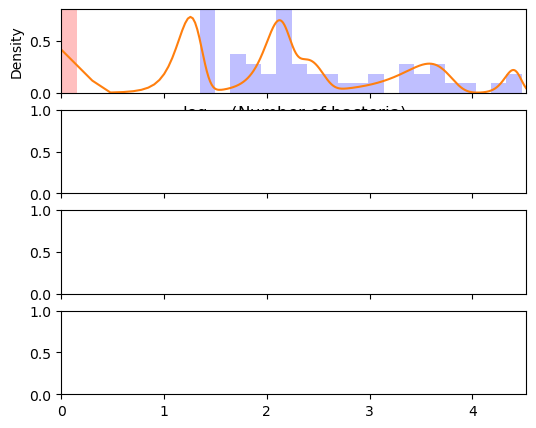

In [5]:
fig,ax = plt.subplots(4,figsize=(6,5),sharex='col')
data_day[0].log_plots(ax[0]) 
[dt.log_plots(axi,legend=False) for (dt,axi) in zip(data_day[1:],ax[1:])]
ym = max([axi.get_ylim()[-1] for axi in ax])
[(axi.set_xlim(0,5.25),axi.set_ylim(0,ym*1.02)) for axi in ax] 
[axi.set_ylabel('Day {}'.format(i),fontsize=12) for (axi,i) in zip(ax,(3,5,7,9))]
[axi.set_xlabel('') for axi in ax[:-1]]

plt.tight_layout()
plt.savefig('graphs/worms.png',dpi=500)